In [1]:
#--- Import libraries ---

#libs for calculation, data handling and plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#libs for machine learning
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#libs for decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# MA124 Maths by Computer: Assignment 4

## Machine Learning Applied to Bike Sharing Demand Data (20 Marks)

---


Mobility is one of the most important and crucial challenges when it comes to urban city planning. In an attempt to make downtown areas more approachable for pedestrians and reduce the air-pollution, many major cities like London, Paris and New York decided to restrict traffic and make way for other means of transportation. One major alternative is **Bike Sharing**, which brings problems on its own, the main one being management of accessibility and demand. In an attempt to resolve this issue, scientists Sathishkumar V E, Jangwoo Park and Yongyun Cho from the Sunchon National University in South Korea employed Data Mining techniques "for overcoming the hurdles for the prediction of hourly rental bike demand"[1]. The models used include "(a) Linear Regression (b) Gradient Boosting Machine (c) Support Vector Machine (Radial Basis Function Kernel) (d) Boosted Trees, and (e) Extreme Gradient Boosting Trees."[1].

[1]Sathishkumar V E,Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March 2020. [web link](https://doi.org/10.1016/j.comcom.2020.02.007).

---

In the following, I would like to attempt applying machine learning to a modified version of the original dataset.

After implementing the data, we give a short review of it making use of the `describe` function.


Below that you can find a histogram showing the frequency of a certain number of bikes being rented at each hour. The boxplot displays the mean value of about 666 indicated by a centred vertical black line. The black lines completing the blue rectangle to the left and right represent the 25th and 75th percentile respectively. The outlines - which are the values lying outside of 1.5 times the difference between upper and lower quartile - are being plotted as black diamonds.

To illustrate the dependence of the number of bikes in demand from the time of the day and season, two violin plot have been set up showing that correlation. Due to space constraints these plot focus on a time window for 10 AM to 2 PM and the Months March, April, May and June.

Having gained an impression of the data we are dealing with, we set up two different regression models to try and make an accurate prediction:

1. Linear regression: This model "is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables".([Wikipeida](https://en.wikipedia.org/wiki/Linear_regression)).

2. Decision tree regression: This "uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves)"[[Wikipedia]](https://en.wikipedia.org/wiki/Decision_tree_learning). The maximum depth hes been set to 6.

In both cases, we set up a design matrix `X` and a target space `y`, the first containing all the data but the variable we seek to predict and the latter containing the very same thing. Then we split both of them up into `X_train`, `X_test` and `y_train`, `y_test` using a ratio of 75:25 based on the ration used in [1] (see [1], Table 2. for reference).

We then proceed to analyse the accuracy of our findings by printing several quality measures: The Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE) and Rsqared (R2). The first two being self-explanatory, Rsquared is a value on the interval $[0,1]$ assigning a value of 1 to a perfect prediction model and 0 to a completely inaccurate.

To further analyse the results of the Regression Models, we have made a scatter plot showing the dependence of the residual (`y_test` - `y_pred`) on `y_test` - the quantity we are trying to predict. To conclude the dependence of the accuracy of our model from the Month, a colourmap has been assigned to the plot. Dark blue dots correspond to January, whereas with increasing redness points represent months closer to June. Dark red markers are data points in June. 

In [2]:
#reading the data into a dataframe 
SeoulBikes = pd.read_csv("SeoulBikeData_mod.csv")

#describe the dataframe
SeoulBikes.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000
mean,665.802607,11.522512,9.476967,54.729147,1.883886,1342.977725,-0.066256,0.606507,0.097275,0.061280,3.492417
std,652.252686,6.930339,11.186973,20.994968,1.084647,622.576774,12.440532,0.910329,0.962272,0.348964,1.723804
min,20.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,177.000000,6.000000,1.100000,38.000000,1.000000,770.750000,-9.800000,0.000000,0.000000,0.000000,2.000000
50%,397.000000,12.000000,10.000000,53.000000,1.700000,1495.000000,0.600000,0.020000,0.000000,0.000000,3.000000
75%,1020.250000,18.000000,19.100000,70.000000,2.600000,1972.000000,10.425000,0.992500,0.000000,0.000000,5.000000
max,3556.000000,23.000000,32.700000,98.000000,7.400000,2000.000000,24.100000,3.520000,35.000000,4.100000,6.000000


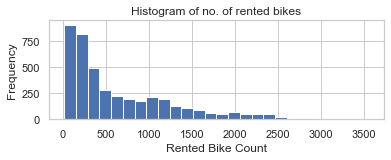

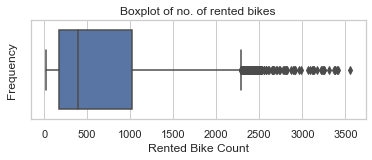

In [12]:
sns.set_theme(style='whitegrid')
#plot histogram of no. of rentedbikes
plt.subplot(211)
plt.title('Histogram of no. of rented bikes')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')

plt.hist(SeoulBikes['Rented Bike Count'], bins=26)
plt.show()

#plot boxplot of the no. of rented bikes
plt.subplot(212)
plt.title('Boxplot of no. of rented bikes')
plt.ylabel('Frequency')

sns.boxplot(x=SeoulBikes['Rented Bike Count'])
plt.show()

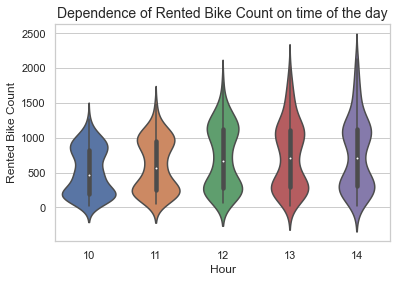

In [4]:
# --- plot the violing plot for Rented Bike Count for different hours of the day ---

#only consider hours 0 to 4
plt.title('Dependence of Rented Bike Count on time of the day', fontsize=14)

df = SeoulBikes.loc[SeoulBikes.Hour > 9]
df = df.loc[df.Hour < 15]
ax = sns.violinplot(x='Hour', y='Rented Bike Count', data=df)

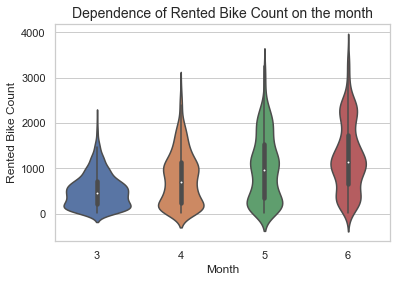

In [5]:
# --- plot the violing plot for Rented Bike Count for different months ---
plt.title('Dependence of Rented Bike Count on the month', fontsize=14)

df = SeoulBikes.loc[SeoulBikes.Month > 2]
ax = sns.violinplot(x='Month', y='Rented Bike Count', data=df)

**Linear Regression**

In [6]:
#defining the design matrix and target
X = SeoulBikes.drop(['Rented Bike Count'], axis=1)
y = SeoulBikes['Rented Bike Count']

#splitting X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

# Use the model to predict the test data
y_pred = regr.predict(X_test)

#calculate the residual
resid = y_test - y_pred

#print the root mean sqared error
RMSE = np.sqrt(np.mean(resid**2))
print('The root mean squared error for linear regression is about: %.2f (to 2dp).' %round(RMSE, 2))

#print the mean absolute error
MAE = np.mean(np.abs(resid))
print('The mean absolute error for linear regression is about: %.2f (to 2dp).' %round(MAE, 2))

#print Rsqared
R2 = r2_score(y_test, y_pred)
print('R2 for linear regression is about: %.2f (to 2dp).' %round(R2, 2))

The root mean squared error for linear regression is about: 412.85 (to 2dp).
The mean absolute error for linear regression is about: 302.24 (to 2dp).
R2 for linear regression is about: 0.60 (to 2dp).


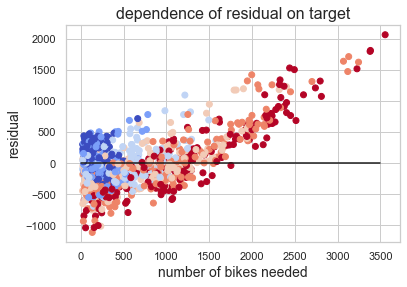

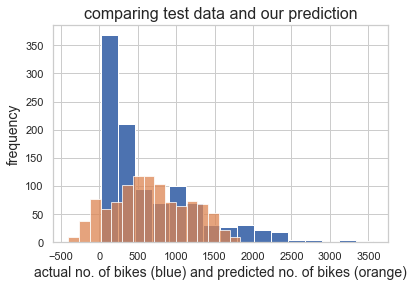

In [7]:
#producing a scatter plot of the residual against y_test
plt.xlabel("number of bikes needed", fontsize="14")
plt.ylabel("residual", fontsize="14")
plt.title("dependence of residual on target", fontsize="16")

colors = X_test['Month']

plt.scatter(y_test, resid, marker='o', c=colors, cmap='coolwarm')
plt.plot([0, 3500],[0, 0], 'k')
plt.show()

#produce a histogram showing both y_test and y_pred
plt.xlabel("actual no. of bikes (blue) and predicted no. of bikes (orange)", fontsize="14")
plt.ylabel("frequency", fontsize="14")
plt.title("comparing test data and our prediction", fontsize="16")
plt.hist(y_test, bins=16)
plt.hist(y_pred, alpha=0.75, bins=16)
plt.show()

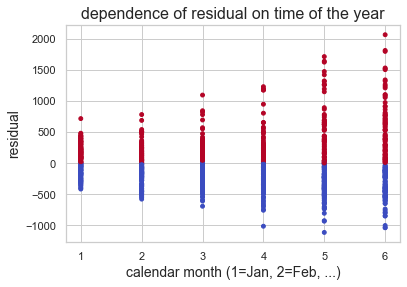

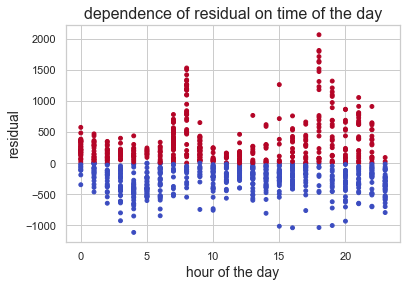

In [8]:
# --- producing a scatter plot of the residual against X_test['Hour'] ---
plt.xlabel("calendar month (1=Jan, 2=Feb, ...)", fontsize="14")
plt.ylabel("residual", fontsize="14")
plt.title("dependence of residual on time of the year", fontsize="16")

#set up the colouring
res = resid.to_numpy()
col = np.zeros(res.size)
for i in range(res.size):
    if res[i]<=0:
        col[i]=1
    else: 
        col[i]=2

#plot the scatter plot        
plt.scatter(X_test['Month'], resid, marker='o', s=15, c=col, cmap='coolwarm')
plt.show()

# --- producing a scatter plot of the residual against X_test['Month'] ---
plt.xlabel("hour of the day", fontsize="14")
plt.ylabel("residual", fontsize="14")
plt.title("dependence of residual on time of the day", fontsize="16")

#set up the colouring
res = resid.to_numpy()
col = np.zeros(res.size)
for i in range(res.size):
    if res[i]<=0:
        col[i]=1
    else: 
        col[i]=2

#plot the scatter plot        
plt.scatter(X_test['Hour'], resid, s=15, marker='o', c=col, cmap='coolwarm')
plt.show()

**Decision Tree Regression**

The root mean squared error for decision tree regression is about: 227.69 (to 2dp).
The mean absolute error for decision tree regression is about: 146.72 (to 2dp).
R2 for decision tree regression is about: 0.88 (to 2dp).


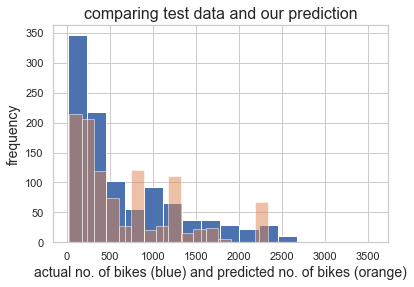

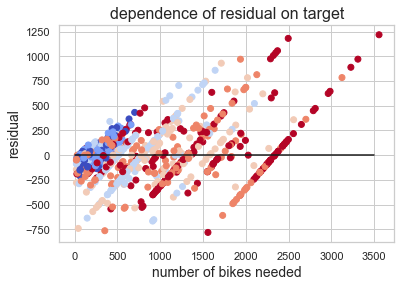

In [9]:
#reading the data into a dataframe 
SeoulBikes = pd.read_csv("SeoulBikeData_mod.csv")

# Create decision tree regressor object
regr = DecisionTreeRegressor(max_depth=6)

#defining the design matrix and target
X = SeoulBikes.drop(['Rented Bike Count'], axis=1)
y = SeoulBikes['Rented Bike Count']

#splitting X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#training the model using the data from X_train
regr.fit(X_test, y_test)
y_pred = regr.predict(X_test)

#calculate the residual
resid = y_test - y_pred

#print the root mean sqared error
RMSE = np.sqrt(np.mean(resid**2))
print('The root mean squared error for decision tree regression is about: %.2f (to 2dp).' %round(RMSE, 2))

#print the mean absolute error
MAE = np.mean(np.abs(resid))
print('The mean absolute error for decision tree regression is about: %.2f (to 2dp).' %round(MAE, 2))

#print Rsqared
R2 = r2_score(y_test, y_pred)
print('R2 for decision tree regression is about: %.2f (to 2dp).' %round(R2, 2))

#plot a historgam comparing y_test and y_pred
sns.set_theme(style='whitegrid')
plt.title("comparing test data and our prediction", fontsize="16")
plt.xlabel("actual no. of bikes (blue) and predicted no. of bikes (orange)", fontsize="14")
plt.ylabel("frequency", fontsize="14")

plt.hist(y_test, bins=16)
plt.hist(y_pred, alpha=0.5, bins=16)
plt.show()

#producing a scatter plot of the residual against y_test
plt.xlabel("number of bikes needed", fontsize="14")
plt.ylabel("residual", fontsize="14")
plt.title("dependence of residual on target", fontsize="16")

colors = X_test['Month']

plt.scatter(y_test, resid, marker='o', c=colors, cmap='coolwarm')
plt.plot([0, 3500],[0, 0], 'k')
plt.show()

**Summary**



Comparing the two approaches we took first, we can say the `Decision Tree Regression` model performed much better than the `Linear Regression` model. In every quantitative accuracy measure the `Decision Tree Regression` model comes out on top (see table below). To set our values into context with the results  in [1], we included the values of the measures obtained in the testing of `XGBTree` - the best performing model in the article - in the table below.

|   	Model:|   Linear Regression 	|   Decision Tree Regression	|  XGBTree ([1], Table 4)|   	|
|:---	|:---:	:|:---	|:---:	|---:	|
|   RMSE	|   403.54	|   233.29	|   183.80	|   	|
|   MEA	|   295.47	|   147.26	|   119.59	|   	|
|   R2	|   0.61	|   0.87	|   0.91	|   	|

Besides the clear dominance of the `Regression tree` model over the `Linear Regression` model in quantitative measures, one of the first thing one notices when comparing their histograms is the difference in their nature. The histogram of the `Linear regression` model shows an output of negative values which is completely useless in the context of bike renting. Furthermore, it does not cling to the actual histogram nearly as nicely as the `Regression tree` model and seems almost normally distributed. 

One phenomenon both models have in common is that they tend to underestimate the number of bikes needed for high demands.

To summarise, it is fair to say, the `Regression Tree` model is overall better much more applicable in real-world scenarios. Both of our models however are being outperformed by the `XGBTree` model applied in [1]. 